In [1]:
import pandas as pd
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
anode_2 = pd.read_csv("anode_OCP_2.csv", header=None)
anode_3 = pd.read_csv("anode_OCP_3.csv", header=None)
cathode_2 = pd.read_csv("cathode_OCP_2.csv", header=None)
cathode_3 = pd.read_csv("cathode_OCP_3.csv", header=None)

In [2]:
# Seperating the data for charge and discharge to get a better fit. this is done by splitting the data where it has maximum.

ch_anode_2 = anode_2[:(anode_2[0].idxmax()+1)]
dch_anode_2 = anode_2[anode_2[0].idxmax():]
ch_anode_3 = anode_3[:(anode_3[0].idxmax()+1)]
dch_anode_3 = anode_3[anode_3[0].idxmax():]

ch_cathode_2 = cathode_2[:(cathode_2[0].idxmax()+1)]
dch_cathode_2 = cathode_2[cathode_2[0].idxmax():]
ch_cathode_3 = cathode_3[:(cathode_3[0].idxmax()+1)]
dch_cathode_3 = cathode_3[cathode_3[0].idxmax():]

In [3]:
# Creating functions with this data via interpolating the values between the samples.

f_ch_anode_2=interpolate.interp1d(ch_anode_2[0], ch_anode_2[1], fill_value ="extrapolate")
f_dch_anode_2=interpolate.interp1d(dch_anode_2[0], dch_anode_2[1], fill_value ="extrapolate")
f_ch_anode_3=interpolate.interp1d(ch_anode_3[0], ch_anode_3[1], fill_value ="extrapolate")
f_dch_anode_3=interpolate.interp1d(dch_anode_3[0], dch_anode_3[1], fill_value ="extrapolate")

f_ch_cathode_2=interpolate.interp1d(ch_cathode_2[0], ch_cathode_2[1], fill_value ="extrapolate")
f_dch_cathode_2=interpolate.interp1d(dch_cathode_2[0], dch_cathode_2[1], fill_value ="extrapolate")
f_ch_cathode_3=interpolate.interp1d(ch_cathode_3[0], ch_cathode_3[1], fill_value ="extrapolate")
f_dch_cathode_3=interpolate.interp1d(dch_cathode_3[0], dch_cathode_3[1], fill_value ="extrapolate")

In [4]:
# Take the maximum point in between the minimums of 2 lines and the minimum point between the maximums of 2 lines
# This is done to making sure the function is minimized within interpolation range. 
# The extrapolation range might not valid.

x_anode = np.linspace(max(min(anode_2[0]), min(anode_3[0])), min(max(anode_2[0]), max(anode_3[0])), num = 10000)

x_cathode = np.linspace(max(min(cathode_2[0]), min(cathode_3[0])), min(max(cathode_2[0]), max(cathode_3[0])), num = 10000)

In [5]:
# Defining the functions to minimize. The effect of charge and discharge is balanced with taking average.

def anode_fit(p):
    return (sum((f_ch_anode_3(x_anode) - f_ch_anode_2(x_anode - p))**2) + sum((f_dch_anode_3(x_anode) - f_dch_anode_2(x_anode - p))**2))/len(x_anode)

def cathode_fit(p):
    return (sum((f_ch_cathode_3(x_cathode) - f_ch_cathode_2(x_cathode - p))**2) + sum((f_dch_cathode_3(x_cathode) - f_dch_cathode_2(x_cathode - p))**2))/len(x_cathode)

In [23]:
# Optimizing functions

from scipy import optimize
anode_optm = optimize.least_squares(anode_fit, 0, method='trf', ftol=1e-18, gtol=1e-15, xtol=1e-15, verbose=2)
cathode_optm = optimize.least_squares(cathode_fit, 0, method='trf', ftol=1e-15, gtol=1e-15, xtol=1e-15, verbose=2)

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.6749e-05                                    1.51e-03    
       1              2         6.3843e-06      2.04e-05       3.55e-02       2.18e-04    
       2              3         1.0499e-06      5.33e-06       5.85e-02       1.86e-05    
       3              5         8.7154e-07      1.78e-07       2.82e-02       3.45e-06    
       4              7         8.6462e-07      6.92e-09       7.04e-03       1.15e-06    
       5              9         8.6346e-07      1.16e-09       1.76e-03       1.87e-07    
       6             11         8.6345e-07      4.07e-13       4.40e-04       6.61e-08    
       7             12         8.6345e-07      9.03e-12       1.10e-04       9.47e-08    
       8             13         8.6344e-07      4.41e-12       2.20e-04       8.09e-08    
       9             14         8.6344e-07      2.81e-12       5.50e-05       6.78e-09    

In [24]:
anode_optm

 active_mask: array([0.])
        cost: 8.634384303158918e-07
         fun: array([0.00131411])
        grad: array([-8.73910669e-12])
         jac: array([[-6.65022526e-09]])
     message: '`xtol` termination condition is satisfied.'
        nfev: 47
        njev: 21
  optimality: 8.739106687347636e-12
      status: 3
     success: True
           x: array([-0.11704944])

In [25]:
cathode_optm

 active_mask: array([0.])
        cost: 1.0187555369941658e-08
         fun: array([0.00014274])
        grad: array([4.75150563e-14])
         jac: array([[3.32875061e-10]])
     message: '`xtol` termination condition is satisfied.'
        nfev: 47
        njev: 16
  optimality: 4.75150562519481e-14
      status: 3
     success: True
           x: array([0.05397501])

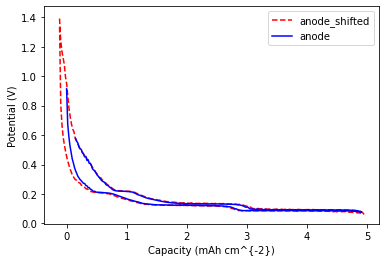

In [26]:
# Plotting Anode

fig, ax = plt.subplots()
ax.plot((anode_2[0]+anode_optm.x), anode_2[1], 'r--', label='anode_shifted')
ax.plot(anode_3[0], anode_3[1], 'b', label='anode')
ax.legend()
plt.xlabel('Capacity (mAh cm^{-2})')
plt.ylabel('Potential (V)')
plt.show()

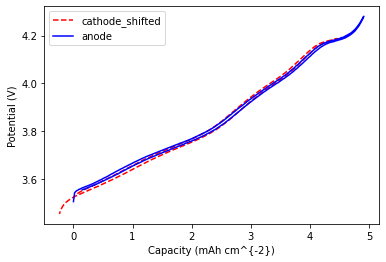

In [27]:
# Plotting Cathode

fig, ax = plt.subplots()
ax.plot((cathode_2[0]+cathode_optm.x), cathode_2[1], 'r--', label='cathode_shifted')
ax.plot(cathode_3[0], cathode_3[1], 'b', label='anode')
ax.legend()
plt.xlabel('Capacity (mAh cm^{-2})')
plt.ylabel('Potential (V)')
plt.show()

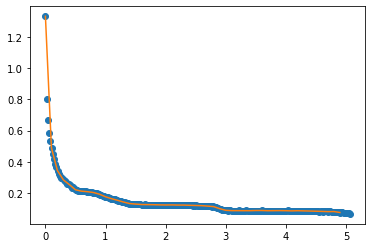

In [12]:
# Plotting samples with fitted line 

xnew = np.arange(0, 5, 0.1)
ynew = f_ch_anode_2(xnew)  
plt.plot(ch_anode_2[0], ch_anode_2[1], 'o', xnew, ynew, '-')
plt.show()